In [1]:
from model import *
from baseline import Baseline
import networkx as nx
from metrics import *
import matplotlib.pyplot as plt

In [2]:
NUMBER_OF_SAMPLES = 1000

In [3]:
def remove_isolated_nodes(graphs):
    for graph in graphs:
        graph.remove_nodes_from(list(nx.isolates(graph)))

In [4]:
datamodule = TUDataMoudle()
datamodule.setup("fit")
training_batch = next(iter(datamodule.train_dataloader())) 
adjesency_matrixes = to_dense_adj(training_batch.edge_index, training_batch.batch)
training_samples = [nx.from_numpy_array(adjesency_matrix.detach().numpy()) for adjesency_matrix in adjesency_matrixes]

remove_isolated_nodes(training_samples)

In [9]:
model = VAE.load_from_checkpoint("../GenGNN/nvhcm4mb/checkpoints/epoch=9999-step=10000.ckpt")
baseline = Baseline(training_samples)

In [12]:
generated_samples = [nx.from_numpy_array(adjesency_matrix.cpu().detach().numpy()) for adjesency_matrix in model.sample(NUMBER_OF_SAMPLES)]
remove_isolated_nodes(generated_samples)

baseline_samples = baseline.sample(NUMBER_OF_SAMPLES)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
def plot_histogram(training_samples, baseline_samples, generated_samples, title, histogram_function, bins=10):
    training_data, baseline_data, generated_data = histogram_function(training_samples), histogram_function(baseline_samples), histogram_function(generated_samples)
   # Increase the width of the figure
    plt.figure(figsize=(20, 5))  
    plt.suptitle(title, fontsize=16)

    # Adjust subplots to fit into the figure area.
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    # Plot training data
    plt.subplot(1, 3, 1)
    plt.hist(training_data, weights=[1/len(training_samples)]*len(training_data), bins=bins)  # Adjust number of bins if needed
    plt.title("Training data", fontsize=12)
    
    # Plot baseline data
    plt.subplot(1, 3, 2)
    plt.hist(baseline_data, weights=[1/len(baseline_samples)]*len(baseline_data), bins=bins)  # Adjust number of bins if needed
    plt.title("Baseline data", fontsize=12)
    
    # Plot generated data
    plt.subplot(1, 3, 3)
    plt.hist(generated_data,  weights=[1/len(generated_samples)]*len(generated_data), bins=bins)  # Adjust number of bins if needed
    plt.title("Generated data", fontsize=12)
    
    # Apply tight layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect parameters as needed

    # Show the plot


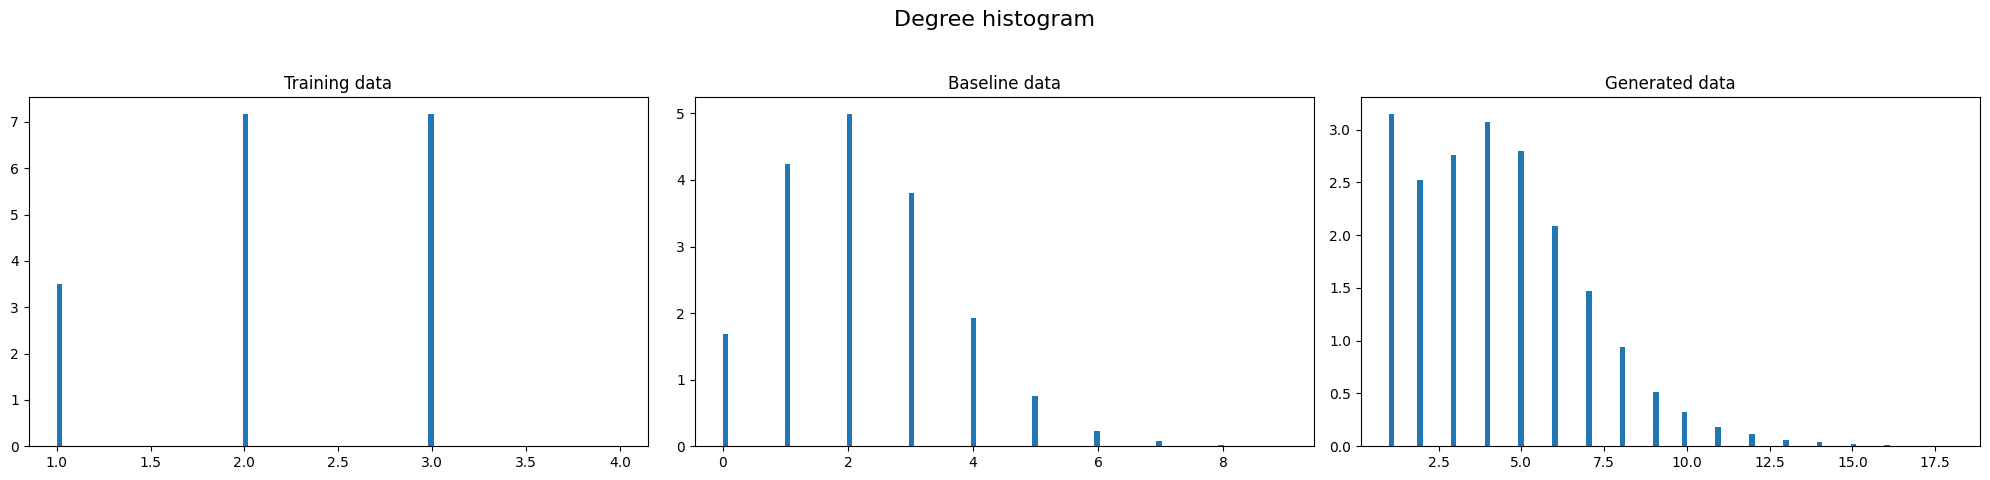

In [ ]:
plot_histogram(training_samples, baseline_samples, generated_samples, "Degree histogram", degree_histogram, 100 )

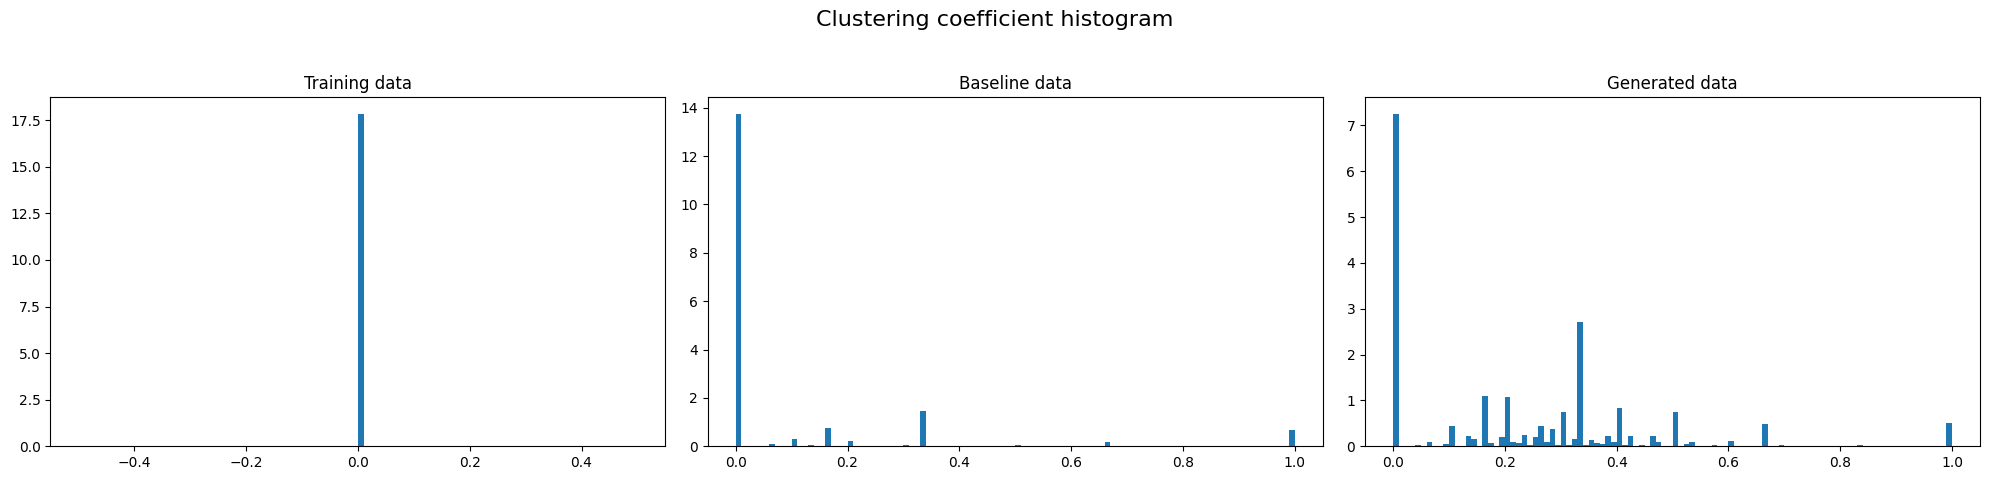

In [ ]:
plot_histogram(training_samples, baseline_samples, generated_samples, "Clustering coefficient histogram", clustering_coefficient_histogram,100 )

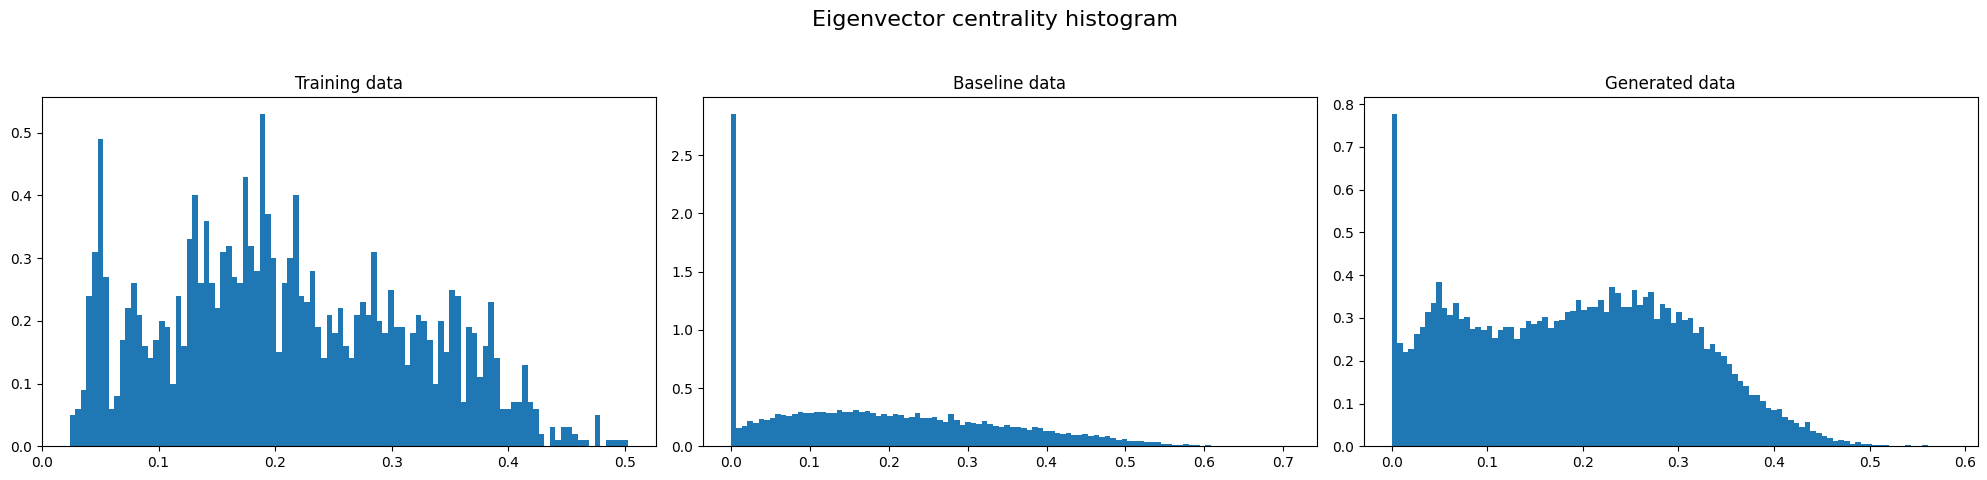

In [ ]:
plot_histogram(training_samples, baseline_samples, generated_samples, "Eigenvector centrality histogram", eigenvector_centrality_histogram, 100 )

In [ ]:
generated_novelty = novel(generated_samples, training_samples)
generated_uniqnes = unique(generated_samples)

print("Generated novelty: ", generated_novelty)
print("Generated uniqnes: ", generated_uniqnes)

baseline_novelty = novel(baseline_samples, training_samples)
baseline_uniqnes = unique(baseline_samples)

print("Baseline novelty: ", baseline_novelty)
print("Baseline uniqnes: ", baseline_uniqnes)


Generated novelty:  1.0
Generated uniqnes:  1.0
Baseline novelty:  1.0
Baseline uniqnes:  0.998
